In [ ]:
from common.util import *
text = 'You say goodbye and I say Hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print("corpus size:", len(corpus))
print("corpus:", corpus)

print("vocab_size:", len(word_to_id))
print("vocab:", word_to_id)

corpus size: 8
corpus: [0 1 2 3 4 1 5 6]
vocab_size: 7
vocab: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

--------------------------------------------------



In [4]:
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # 'you'의 문맥벡터
c1 = C[word_to_id['i']] # 'i'의 문맥벡터
print("'you' - 'i' similarity(-1~1):", cos_similarity(c0, c1))

most_similar('you', word_to_id, id_to_word, C)

'you' - 'i' similarity(-1~1): 0.7071067691154799

[query] you
 goodbye: 0.7071067691154799
 hello: 0.7071067691154799
 i: 0.7071067691154799
 and: 0.0
 say: 0.0


In [5]:
W = ppmi(C)
np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [ ]:
# U: 단어 공간
# S: 특잇값 대각행렬 (중요도 순으로 정렬됨)
# V: 문맥 공간
U, S, V = np.linalg.svd(W)
print('동시발생 행렬:', C[0])
print('PPMI행렬:', W[0])
print('SVD:', U[0])
print('차원 감소된 SVD (앞쪽이 중요한 정보):', U[0,:2])

동시발생 행렬: [0 1 0 0 0 0 0]
PPMI행렬: [0.    1.807 0.    0.    0.    0.    0.   ]
SVD: [-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]
차원 감소된 SVD (앞쪽이 중요한 정보): [-1.110e-16  3.409e-01]


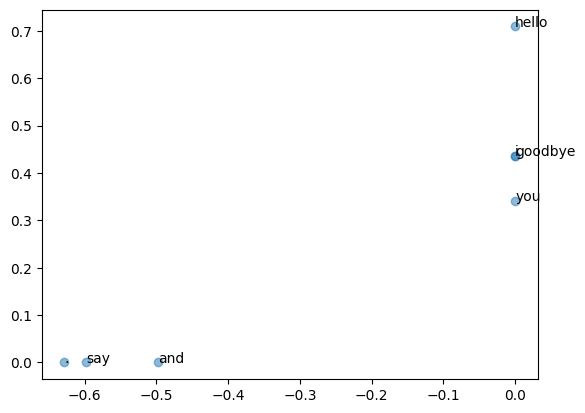

In [10]:
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) # 2차원으로 축소하여 렌더링

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()